In [1]:
# @title Descargamos la librería Selenium
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 27.8 MB/s eta 0:00:00


In [1]:
# @title Cargamos las librerías necesarias

from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
import bs4 as bs
import time
import pandas as pd
import numpy as np
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from google.colab import drive
from google.colab import files
import seaborn as sns
drive.mount('/content/drive')
#datos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Inmuebles24.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title Scrapeando el dominio

#Las excepciones anidadas están ahí con la intención de cargar nuevamente el drive en caso de que la petición al servidor falle o sea denegada


costos = []
direccion = []
baños = []
recamaras = []
area = []
t_0 = [costos, direccion, baños, recamaras, area ]
set_len = [len(t_0[0]),len(t_0[1]),len(t_0[2]),len(t_0[3]),len(t_0[4])]
domain = ''
for a in range(1,3):
  #service = ChromeService(port=1234)
  options = webdriver.ChromeOptions()
  options.add_argument("--verbose")
  options.add_argument('--no-sandbox')
  options.add_argument('--headless')
  options.add_argument('--disable-gpu')
  options.add_argument("--window-size=1920, 1200")
  options.add_argument('--disable-dev-shm-usage')
  options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")

  driver = webdriver.Chrome(options=options)
  driver.quit()
  time.sleep(5)
  domainn = 'https://www.lamudi.com.mx/distrito-federal/departamento/for-rent/?page='+str(a)

  try:
    driver.quit()
    #service = ChromeService(port=1234)
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")

    driver = webdriver.Chrome(options=options)
    driver.get(domainn)
    #html = driver.page_source
    soup = bs.BeautifulSoup(driver.page_source,'html.parser')
#    print(sopa.text)
    driver.quit()
  except:
    try:
      driver.quit()
      #service = ChromeService(port=1234)

      options = webdriver.ChromeOptions()
      options.add_argument("--verbose")
      options.add_argument('--no-sandbox')
      options.add_argument('--headless')
      options.add_argument('--disable-gpu')
      options.add_argument("--window-size=1920, 1200")
      options.add_argument('--disable-dev-shm-usage')
      options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")

      driver = webdriver.Chrome(options=options)
      driver.get(domainn)
      soup = bs.BeautifulSoup(driver.page_source,'html.parser')
      #print(sopa.text)
      #html = sopa.text
      driver.quit()
    except:
      try:
        driver.quit()
        service = ChromeService(port=1234)
        options = webdriver.ChromeOptions()
        options.add_argument("--verbose")
        options.add_argument('--no-sandbox')
        options.add_argument('--headless')
        options.add_argument('--disable-gpu')
        options.add_argument("--window-size=1920, 1200")
        options.add_argument('--disable-dev-shm-usage')
        options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")

        driver = webdriver.Chrome(options=options)
        driver.get(domainn)
        soup = bs.BeautifulSoup(driver.page_source,'html.parser')
        #print(sopa.text)
        #html = sopa.text
        driver.quit()
      except:
        try:
          driver.quit()
          service = ChromeService(port=1234)
          options = webdriver.ChromeOptions()
          options.add_argument("--verbose")
          options.add_argument('--no-sandbox')
          options.add_argument('--headless')
          options.add_argument('--disable-gpu')
          options.add_argument("--window-size=1920, 1200")
          options.add_argument('--disable-dev-shm-usage')
          options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")

          driver = webdriver.Chrome(options=options)
          driver.get(domainn)
          soup = bs.BeautifulSoup(driver.page_source,'html.parser')

        #html = sopa.text
          driver.quit()
        except:
          pass

  for i in range(len(soup.findAll('div',{'class':'location'}))):
    try:
      if ((len(direccion)==len(costos))&(len(direccion)==len(recamaras))&(len(direccion)==len(baños))&(len(direccion)==len(area)))&((len(costos)==len(recamaras))&(len(costos)==len(baños))&(len(costos)==len(area)))&((len(recamaras)==len(baños))&(len(recamaras)==len(area)))&(len(baños)==len(area)):
        direccion.append(soup.find_all('div',{'class':'location'})[i].find_all('div')[1].text.strip())
        costos.append(soup.find_all('div',{'class':'price'})[i].find_all('span')[0].text.strip())
        recamaras.append(soup.find_all('div',{'class':'properties'})[i].find_all('div',{'class':'property__number'})[0].text.strip())
        baños.append(soup.find_all('div',{'class':'properties'})[i].find_all('div',{'class':'property__number'})[1].text.strip())
        area.append(soup.find_all('div',{'class':'properties'})[i].find_all('div',{'class':'property__number'})[2].text.strip())
        #if  ((len(direccion)==len(costos))&(len(direccion)==len(recamaras))&(len(direccion)==len(baños))&(len(direccion)==len(area)))&((len(costos)==len(recamaras))&(len(costos)==len(baños))&(len(costos)==len(area)))&((len(recamaras)==len(baños))&(len(recamaras)==len(area)))&(len(baños)==len(area)):
         # continue
      else:
        for k in range(len(t_0)):
          set_len[k] = len(t_0[k])
        for i in t_0:
          while(len(i)!=max(set_len)):
            i.append('')


    except:
      pass


df_rents = pd.DataFrame(list(zip(direccion,costos,recamaras,baños,area)),
                            columns=['Direccion','Costo','Recamaras','Baños','Area'])
df_rents.to_csv('distribucion_renta_cdmx.csv', encoding = 'utf-8-sig')
files.download('distribucion_renta_cdmx.csv')


<ipython-input-5-9dfc15fc9f56>:109: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  for i in range(len(soup.findAll('div',{'class':'location'}))):


In [12]:
#Las excepciones anidadas están ahí con la intención de cargar nuevamente el drive en caso de que la petición al servidor falle o sea denegada


costos = []
direccion = []
baños = []
recamaras = []
area = []
terraza=[]
seguridad=[]
jardines=[]
estacionamiento=[]
balcon = []
gimnasio =[]
albercas =[]

t_0 = [costos, direccion, baños, recamaras, area,terraza,seguridad,jardines,estacionamiento,balcon,gimnasio,albercas ]
set_len = [len(t_0[0]),len(t_0[1]),len(t_0[2]),len(t_0[3]),len(t_0[4]),len(t_0[5]),len(t_0[6]),len(t_0[7]),len(t_0[8]),len(t_0[9]),len(t_0[10]),len(t_0[11])]
domain = ''
for a in range(1,162):
  #service = ChromeService(port=1234)
  options = webdriver.ChromeOptions()
  options.add_argument("--verbose")
  options.add_argument('--no-sandbox')
  options.add_argument('--headless')
  options.add_argument('--disable-gpu')
  options.add_argument("--window-size=1920, 1200")
  options.add_argument('--disable-dev-shm-usage')
  options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")

  driver = webdriver.Chrome(options=options)
  #driver.quit()
  time.sleep(5)
  domainn = 'https://www.lamudi.com.mx/distrito-federal/departamento/for-rent/?page='+str(a)

  try:
   # driver.quit()
    #service = ChromeService(port=1234)
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")

    driver = webdriver.Chrome(options=options)
    driver.get(domainn)
    #html = driver.page_source
    soup = bs.BeautifulSoup(driver.page_source,'html.parser')
    print(soup.text)
    #driver.quit()
  except:
    try:
    #  driver.quit()
      #service = ChromeService(port=1234)

      options = webdriver.ChromeOptions()
      options.add_argument("--verbose")
      options.add_argument('--no-sandbox')
      options.add_argument('--headless')
      options.add_argument('--disable-gpu')
      options.add_argument("--window-size=1920, 1200")
      options.add_argument('--disable-dev-shm-usage')
      options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")

      driver = webdriver.Chrome(options=options)
      driver.get(domainn)
      soup = bs.BeautifulSoup(driver.page_source,'html.parser')
      print(soup.text)
      #html = sopa.text
     # driver.quit()
    except:
      try:
     #   driver.quit()
        service = ChromeService(port=1234)
        options = webdriver.ChromeOptions()
        options.add_argument("--verbose")
        options.add_argument('--no-sandbox')
        options.add_argument('--headless')
        options.add_argument('--disable-gpu')
        options.add_argument("--window-size=1920, 1200")
        options.add_argument('--disable-dev-shm-usage')
        options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")

        driver = webdriver.Chrome(options=options)
        driver.get(domainn)
        soup = bs.BeautifulSoup(driver.page_source,'html.parser')
        print(soup.text)
        #html = sopa.text
      #  driver.quit()
      except:
        try:
       #   driver.quit()
          service = ChromeService(port=1234)
          options = webdriver.ChromeOptions()
          options.add_argument("--verbose")
          options.add_argument('--no-sandbox')
          options.add_argument('--headless')
          options.add_argument('--disable-gpu')
          options.add_argument("--window-size=1920, 1200")
          options.add_argument('--disable-dev-shm-usage')
          options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36")

          driver = webdriver.Chrome(options=options)
          driver.get(domainn)
          soup = bs.BeautifulSoup(driver.page_source,'html.parser')
          print(soup.text)

        #html = sopa.text
        #  driver.quit()
        except:
          pass

  for i in range(len(soup.find_all('div',{'class':'snippet__content'}))):
    try:
      if ((len(direccion)==len(costos))&(len(direccion)==len(recamaras))&(len(direccion)==len(baños))&(len(direccion)==len(area)))&((len(costos)==len(recamaras))&(len(costos)==len(baños))&(len(costos)==len(area)))&((len(recamaras)==len(baños))&(len(recamaras)==len(area)))&(len(baños)==len(area)):
        direccion.append(soup.find_all('div',{'class':'snippet__content__location'})[i].text.strip())

        costos.append(soup.find_all('div',{'class':'snippet__content__price'})[i].text.strip())
        recamaras.append(soup.find_all('div',{'class':'snippet__content__properties'})[i].find_all('span',{'class':'property__number bedrooms'})[0].text.strip()   )
        baños.append(soup.find_all('div',{'class':'snippet__content__properties'})[i].find_all('span',{'class':'property__number bathrooms'})[0].text.strip()   )
        area.append(soup.find_all('div',{'class':'snippet__content__properties'})[i].find_all('span',{'class':'property__number area'})[0].text.strip()   )
        try:
          terraza.append(soup.find_all('div',{'class':'snippet__content__properties'})[i].find_all('span',{'class':'property__number terrace principal-amenity'})[0].text.strip()   )
        except:
          terraza.append('')

        try:
          seguridad.append(soup.find_all('div',{'class':'snippet__content__properties'})[i].find_all('span',{'class':'property__number security principal-amenity'})[0].text.strip()   )

        except:
          seguridad.append('')
        try:
          jardines.append(soup.find_all('div',{'class':'snippet__content__properties'})[i].find_all('span',{'class':'property__number garden principal-amenity'})[0].text.strip()   )
        except:
          jardines.append('')
        try:
          estacionamiento.append(soup.find_all('div',{'class':'snippet__content__properties'})[i].find_all('span',{'class':'property__number car_park principal-amenity'})[0].text.strip()   )
        except:
          estacionamiento.append('')
        try:
          balcon.append(soup.find_all('div',{'class':'snippet__content__properties'})[i].find_all('span',{'class':'property__number balcony principal-amenity'})[0].text.strip()   )
        except:
          balcon.append('')
        try:
          gimnasio.append(soup.find_all('div',{'class':'snippet__content__properties'})[i].find_all('span',{'class':'property__number gym principal-amenity'})[0].text.strip()   )
        except:
          gimnasio.append('')
        try:
          albercas.append(soup.find_all('div',{'class':'snippet__content__properties'})[i].find_all('span',{'class':'property__number swimming_pool principal-amenity'})[0].text.strip()   )
        except:
          albercas.append('')

      else:
        for k in range(len(t_0)):
          set_len[k] = len(t_0[k])
        for i in t_0:
          while(len(i)!=max(set_len)):
            i.append('')


    except:
      pass


df_rents = pd.DataFrame(list(zip(costos, direccion, baños, recamaras, area,terraza,seguridad,jardines,estacionamiento,balcon,gimnasio,albercas )),
                            columns=['Costos', 'Direccion', 'Baños', 'Recamaras', 'Area','Terraza','Seguridad','Jardines','Estacionamientos','Balcón','Gimnasio','Albercas'])


Se han truncado las últimas 5000 líneas del flujo de salida.
                

                    $ 8,200 MXN
                


2


1


65 m²


Balcón





Ver mas info

                    Whatsapp
                



                                Blue eye
                            

                                    Miembro desde 2,023
                                







Ver mas info

                    Whatsapp
                











21







Departamento en Renta en Narvarte

Narvarte, Benito Juárez, Ciudad de México


                    Departamento de 97 m², 3 recamaras sin closet, sala, cocina únicamente con tarja, comedor y un baño, una alcoba, no cuenta con estacionamiento; el gas es únicamente de cilindro (ustedes llevan su cilindro), la lavadora va dentro del departamento y la instalación es por su cuenta. No cobramos mantenimiento ni agua *$12,900.00*. No aceptamos mascotas 
                

                    $ 13,000 MXN
                


3


1


9

In [13]:
df_rents


,Costos,Direccion,Baños,Recamaras,Area,Terraza,Seguridad,Jardines,Estacionamientos,Balcón,Gimnasio,Albercas
0,"Desde $ 17,500 MXN","Juárez, Cuauhtémoc, Ciudad de México",1 - 2,1 - 2,40 - 70 m²,,,,,,,
1,"Desde $ 14,900 MXN","Lomas de Sotelo, Naucalpan de Juárez, Estado d...",1 - 2,1 - 2,37 - 68 m²,,,,,,,
2,"$ 33,000 MXN","Tabacalera, Cuauhtémoc, Ciudad de México",2,2,90 m²,,,,,,,
3,"$ 40,200 MXN","Ampliación Granada, Miguel Hidalgo, Ciudad de ...",1,1,68 m²,,Seguridad,,,,,
4,"$ 24,600 MXN","Ampliación Granada, Miguel Hidalgo, Ciudad de ...",1,1,42 m²,,,,,,Gimnasio,
...,...,...,...,...,...,...,...,...,...,...,...,...
4438,"$ 22,000 MXN","Narvarte, Benito Juárez, Ciudad de México",2,2,95 m²,Terraza,,,,,,
4439,"$ 27,000 MXN","Polanco, Miguel Hidalgo, Ciudad de México",1,2,85 m²,,,,,,,
4440,"$ 23,000 MXN","Nueva Vallejo, Gustavo A. Madero, Ciudad de Mé...",2,2,52 m²,Terraza,,,,,,
4441,"$ 9,000 MXN","Área 1, Cuauhtémoc, Ciudad de México",1,2,63 m²,,,,,,,


In [14]:
df_rents.to_csv('distribucion_renta_cdmx.csv', encoding = 'utf-8-sig')
files.download('distribucion_renta_cdmx.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_inmuebles[df_inmuebles['Costo']>0].max()

Direccion    Ángel Zimbrón, Azcapotzalco, Ciudad de México
Costo                                             70000000
dtype: object

In [27]:
# @title Limpieza de los campos de costos

a = list(df_rents['Costos'].replace(['$'],['']))


In [28]:
a_copy=[]
for i in a:
  print(i.replace('MXN','').replace('$','').replace(',','').replace('USD','').replace('Desde','').replace('Consultar precios','0').replace('Remate Bancario','0').strip())
  a_copy.append(float(i.replace('MXN','').replace('$','').replace(',','').replace('USD','').replace('Desde','').replace('Consultar precios','0').replace('Remate Bancario','0').replace('\n','').replace(' 0','').strip()))


17500
14900
33000
40200
24600
35019
62000
39500
29500
28500
95000
45000
62000
71000
45004
24244
15000
75000
22700
45000
37000
50000
32500
60000
22000
12000
55000
22500
40000
22800
36919
42600
29500
36919
67000
22843
45000
34000
29000
92000
2000
30000
23000
85000
49000
4500
21000
110000
48800
43000
16500
5995000
35000
19500
100000
85000
26176
73500
19500
12600
34000
42000
0
18000
25000
25000
20469
75000
38000
38000
110000
29800
37000
30000
18600
34000
20000
16000
45000
17500
45000
38000
19800
37000
150000
24242
55000
29000
29000
55000
65000
24242
37000
35000
138000
24242
120000
30000
65000
35119
42600
35004
19504
29500
46000
30519
34000
29500
30000
20000
37001
25048
55000
29000
24242
50000
35200
17700
27000
39800
145000
80000
37000
37000
8000
52000
37000
80000
35000
40000
6000
8000
20500
30000
37000
39800
145000
35000
40000
40000
30000
52000
42000
130000
35000
24242
30000
24242
68640
19900
39500
28050
41000
21000
30000
15000
23000
35000
75000
33000
27000
45000
20500
100000
52000
20000
2

In [37]:
df_rents['Precio'] = a_copy
df_rents

,Costos,Direccion,Baños,Recamaras,Area,Terraza,Seguridad,Jardines,Estacionamientos,Balcón,Gimnasio,Albercas,Precio
0,"Desde $ 17,500 MXN","Juárez, Cuauhtémoc, Ciudad de México",1 - 2,1 - 2,40 - 70 m²,,,,,,,,17500.0
1,"Desde $ 14,900 MXN","Lomas de Sotelo, Naucalpan de Juárez, Estado d...",1 - 2,1 - 2,37 - 68 m²,,,,,,,,14900.0
2,"$ 33,000 MXN","Tabacalera, Cuauhtémoc, Ciudad de México",2,2,90 m²,,,,,,,,33000.0
3,"$ 40,200 MXN","Ampliación Granada, Miguel Hidalgo, Ciudad de ...",1,1,68 m²,,Seguridad,,,,,,40200.0
4,"$ 24,600 MXN","Ampliación Granada, Miguel Hidalgo, Ciudad de ...",1,1,42 m²,,,,,,Gimnasio,,24600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,"$ 22,000 MXN","Narvarte, Benito Juárez, Ciudad de México",2,2,95 m²,Terraza,,,,,,,22000.0
4439,"$ 27,000 MXN","Polanco, Miguel Hidalgo, Ciudad de México",1,2,85 m²,,,,,,,,27000.0
4440,"$ 23,000 MXN","Nueva Vallejo, Gustavo A. Madero, Ciudad de Mé...",2,2,52 m²,Terraza,,,,,,,23000.0
4441,"$ 9,000 MXN","Área 1, Cuauhtémoc, Ciudad de México",1,2,63 m²,,,,,,,,9000.0


In [62]:
# @title Limpieza de los campos de número de baños
baños_copy = list(df_rents['Baños'])
baños_clean = []
for baño in baños_copy:
  try:
    if len(baño.split())==1:
      baños_clean.append(int(baño.strip()))
    else:
      baños_clean.append(int(baño.split('-')[-1].strip()))
  except:
    baños_clean.append(np.nan)



In [64]:
# @title Limpieza de los campos de número de recámaras

recamaras_copy = list(df_rents['Recamaras'])
recamaras_clean = []
for recamara in recamaras_copy:
  try:
    if len(recamara.split())==1:
      recamaras_clean.append(int(recamara.strip()))
    else:
      recamaras_clean.append(int(recamara.split('-')[-1].strip()))
  except:
    recamaras_clean.append(np.nan)

In [97]:
# @title Limpieza de los campos de número de área de los inmuebles

m2 = df_rents['Area'][0].split()[-1]
area_copy = list(df_rents['Area'])
area_clean = []
for aream2 in area_copy:
  area = aream2.replace(m2,'')

  try:
    if len(area.split('-'))==1:
      area_clean.append(int(area.replace(',','').strip()))
    else:
      #print(area.split('-')[-1].strip())
      area_clean.append(int(area.split('-')[-1].strip().replace(',','')))
  except:
    area_clean.append(np.nan)

In [106]:
# @title Limpieza de los campos de número de estacionamientos de los inmuebles

estacionamientos_copy = list(df_rents['Estacionamientos'])
estacionamientos_clean = []
for parking in estacionamientos_copy:
  if len(parking)==0:
    estacionamientos_clean.append(0)
  else:
    if parking =='Estacionamiento':
      estacionamientos_clean.append(1)
    else:
      estacionamientos_clean.append(int(parking.split(' ')[0]))



In [104]:

print(df_rents['Terraza'].unique())
print(df_rents['Estacionamientos'].unique())
print(df_rents['Seguridad'].unique())
print(df_rents['Jardines'].unique())
print(df_rents['Balcón'].unique())
print(df_rents['Gimnasio'].unique())
print(df_rents['Albercas'].unique())

['' 'Terraza']
['' '1 Estacionamiento' 'Estacionamiento' '2 Estacionamientos'
 '3 Estacionamientos' '6 Estacionamientos' '4 Estacionamientos'
 '5 Estacionamientos' '8 Estacionamientos']
['' 'Seguridad']
['' 'Jardín']
['' 'Balcón']
['' 'Gimnasio']
['' 'Alberca']


In [112]:
# @title Limpieza del resto de campos de amenidades

Terraza_copy = df_rents['Terraza']
Terraza_clean=[]
for terraza in Terraza_copy:
  if len(terraza)==0:
    Terraza_clean.append(0)
  else:
    Terraza_clean.append(1)

Seguridad_copy = df_rents['Seguridad']
Seguridad_clean=[]

for seguridad in Seguridad_copy:
  if len(seguridad)==0:
    Seguridad_clean.append(0)
  else:
    Seguridad_clean.append(1)


Balcon_copy = df_rents['Balcón']
Balcon_clean=[]

for balcon in Balcon_copy:
  if len(balcon)==0:
    Balcon_clean.append(0)
  else:
    Balcon_clean.append(1)

Gym_copy = df_rents['Gimnasio']
Gym_clean=[]

for gym in Gym_copy:
  if len(gym)==0:
    Gym_clean.append(0)
  else:
    Gym_clean.append(1)

pool_copy = df_rents['Albercas']
pool_clean=[]

for pool in pool_copy:
  if len(pool)==0:
    pool_clean.append(0)
  else:
    pool_clean.append(1)

gard_copy = df_rents['Jardines']
gard_clean=[]

for gard in gard_copy:
  if len(gard)==0:
    gard_clean.append(0)
  else:
    gard_clean.append(1)



In [120]:
#Validando que todas las columnas tengan igual número de elementos
print(len(area_clean),len(recamaras_clean),len(baños_clean),len(estacionamientos_clean),len(Balcon_clean),len(gard_clean),len(pool_clean),len(Gym_clean),len(Balcon_clean),len(Seguridad_clean),len(Terraza_clean))

4443 4443 4443 4443 4443 4443 4443 4443 4443 4443 4443


In [123]:
# Una vez limpios los datos, formamos un diccionario

table_rent = {'Direccion':list(df_rents['Direccion']),'Costo':list(df_rents['Precio']),'Baños':baños_clean,'Recamaras':recamaras_clean,'Area':area_clean,'Estacionamientos':estacionamientos_clean,'Seguridad':Seguridad_clean,'Balcon':Balcon_clean,'Terraza':Terraza_clean,'Jardines':gard_clean,'Alberca':pool_clean,'Gimnasio':Gym_clean }

In [125]:
# @title Dataframe de datos limpios

table_rent_clean = pd.DataFrame.from_dict(table_rent)

In [134]:
# @title Casteando a formato .csv

table_rent_clean.to_csv('distribucion_renta_cdmx_clean.csv', encoding = 'utf-8-sig')
files.download('distribucion_renta_cdmx_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [133]:
# @title Estadística descriptiva básica
table_rent_clean.describe()

,Costo,Baños,Recamaras,Area,Estacionamientos,Seguridad,Balcon,Terraza,Jardines,Alberca,Gimnasio
count,4.443000e+03,4166.000000,4226.000000,4054.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000,4443.000000
mean,5.083042e+04,1.758761,1.929721,120.084361,0.877785,0.118388,0.009903,0.044564,0.005402,0.034886,0.029935
std,2.923844e+05,0.833073,0.915886,125.044958,1.010819,0.323104,0.099032,0.206369,0.073306,0.183513,0.170426
min,0.000000e+00,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.100000e+04,1.000000,1.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.936700e+04,2.000000,2.000000,87.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000e+04,2.000000,2.000000,140.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.255360e+06,16.000000,25.000000,4676.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Costo', ylabel='Density'>

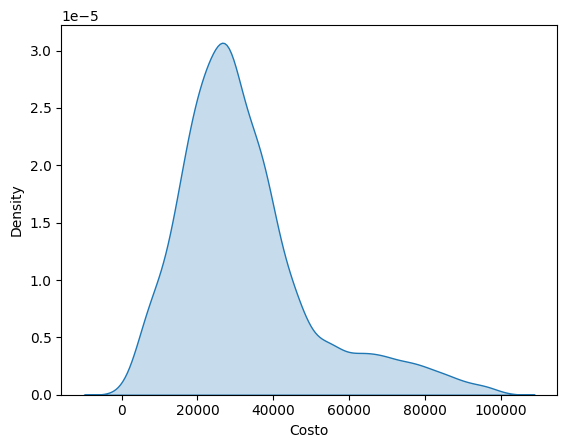

In [143]:
# @title Kernel density fit para la distribución de la renta
sns.kdeplot(table_rent_clean[(table_rent_clean['Costo']<100000)]    ,x='Costo',fill=True)

<Axes: xlabel='Costo', ylabel='Count'>

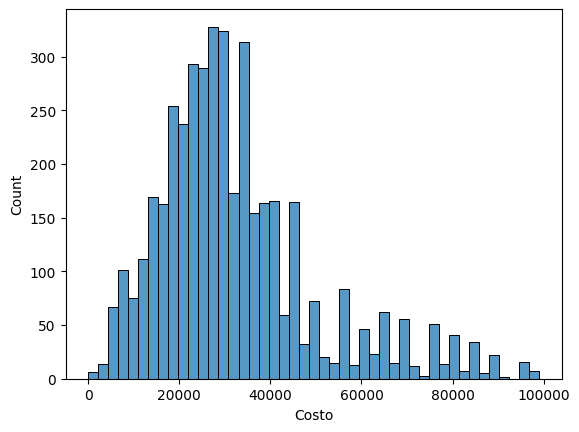

In [163]:
# @title Distribución de la renta, histograma

sns.histplot(table_rent_clean[(table_rent_clean['Costo']<100000)]    ,x='Costo',bins=45)


In [167]:
# @title Agrupamos los datos por colonias promediando costos

table_rent_clean.groupby('Direccion')['Costo'].mean().reset_index().sort_values('Costo',ascending=True)

df_group= table_rent_clean.groupby('Direccion')['Costo'].mean().reset_index().sort_values('Costo',ascending=True)

<Axes: xlabel='Costo', ylabel='Proportion'>

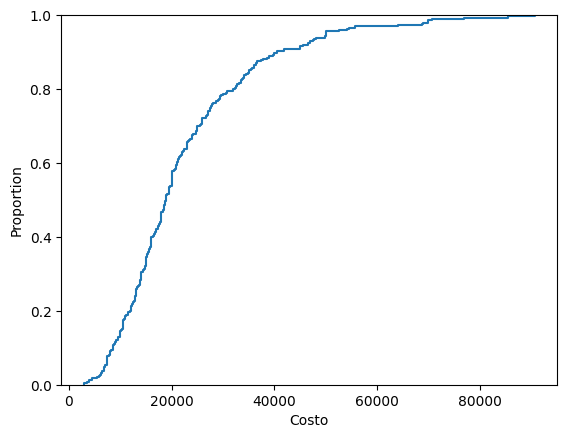

In [168]:
# @title Finalmente graficamos la distribución acumulativa

#Nótese el perfil de Pareto de la correspondiente CDF


sns.ecdfplot(df_group[(df_group['Costo']>1000)&(df_group['Costo']<100000)],x='Costo')

In [184]:
table_rent_clean[table_rent_clean['Direccion'].str.contains('Azca')]


,Direccion,Costo,Baños,Recamaras,Area,Estacionamientos,Seguridad,Balcon,Terraza,Jardines,Alberca,Gimnasio
237,"El Jagüey, Azcapotzalco, Ciudad de México",14500.0,2.0,2.0,60.0,1,0,0,0,0,0,0
478,"Ferrería, Azcapotzalco, Ciudad de México",10700.0,1.0,3.0,83.0,0,1,0,0,0,0,0
556,"El Jagüey, Azcapotzalco, Ciudad de México",12000.0,1.0,2.0,57.0,1,0,0,0,0,0,0
566,"Del Gas, Azcapotzalco, Ciudad de México",19000.0,1.0,1.0,70.0,2,0,0,0,0,0,0
572,"Del Gas, Azcapotzalco, Ciudad de México",19000.0,1.0,1.0,70.0,2,0,0,0,0,0,0
650,"Del Gas, Azcapotzalco, Ciudad de México",7500.0,1.0,1.0,9.0,0,0,0,0,0,1,0
651,"Clavería, Azcapotzalco, Ciudad de México",13000.0,1.0,2.0,60.0,0,0,0,0,0,0,0
655,"Del Gas, Azcapotzalco, Ciudad de México",7500.0,1.0,1.0,9.0,0,0,0,0,0,1,0
668,"Santa Ines, Azcapotzalco, Ciudad de México",14500.0,2.0,2.0,63.0,1,0,0,0,0,0,0
980,"San Álvaro, Azcapotzalco, Ciudad de México",17706.0,1.0,2.0,60.0,1,0,0,0,0,0,0


In [185]:
colonias=[]
alcaldias = []
for i in range(len(table_rent_clean['Direccion'])):
  colonias.append(table_rent_clean['Direccion'][i].split(',')[0])
  alcaldias.append(table_rent_clean['Direccion'][i].split(',')[1])



for alcaldia in set(alcaldias):
  print(alcaldia)



 Ciudad de México
 Benito Juárez
 Cuauhtémoc
 Huixquilucan
 La Magdalena Contreras
 Álvaro Obregón
 Tláhuac
 Cuajimalpa de Morelos
 Xochimilco
 Miguel Hidalgo
 Iztacalco
 Iztapalapa
 Naucalpan de Juárez
 Gustavo A. Madero
 Venustiano Carranza
 Milpa Alta
 Azcapotzalco
 Coyoacán
 Tlalpan


In [189]:
table_rent_clean['Alcaldia'] = alcaldias
table_rent_clean['Colonia'] = colonias

In [198]:
table_rent_clean['Alcaldia'].value_counts()

,count
Alcaldia,
Miguel Hidalgo,1489
Cuauhtémoc,1224
Benito Juárez,537
Cuajimalpa de Morelos,433
Álvaro Obregón,304
Tlalpan,77
Coyoacán,68
Naucalpan de Juárez,57
Azcapotzalco,53
